# Author: Sandesh Basnet

# Customer Segmentation 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import warnings

In [3]:
df = pd.read_csv('./dataset/dataset/Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k)       200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k)         0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
 x = df[['Annual Income (k)', 'Spending Score (1-100)']]   #slicing 
# x = df.ilock[:, 3:]

In [9]:
x.sample(5)

,Annual Income (k),Spending Score (1-100)
65,48,59
177,88,69
25,28,82
83,54,44
72,50,49


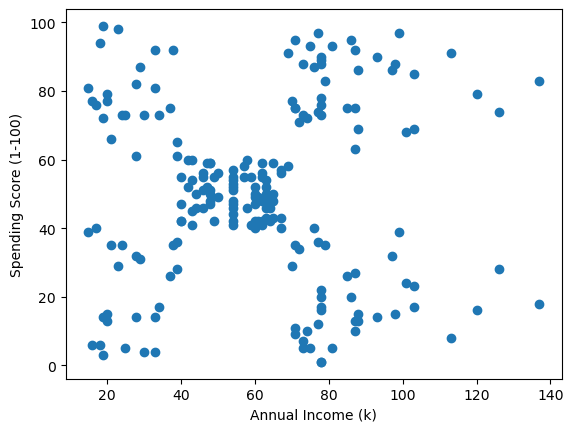

In [10]:
plt.scatter(x['Annual Income (k)'], x['Spending Score (1-100)'])
plt.xlabel('Annual Income (k)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [11]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [12]:
# KMeans(unsupervised), agglomerativecluster, equi distance, manhathron, Jaccard Similarity

# Elbow method

In [13]:
sse = [] #sum of squared errors


for clusters in range(1, 10):
    k = KMeans(n_clusters = clusters)
    k.fit(x)
    sse.append(k.inertia_)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

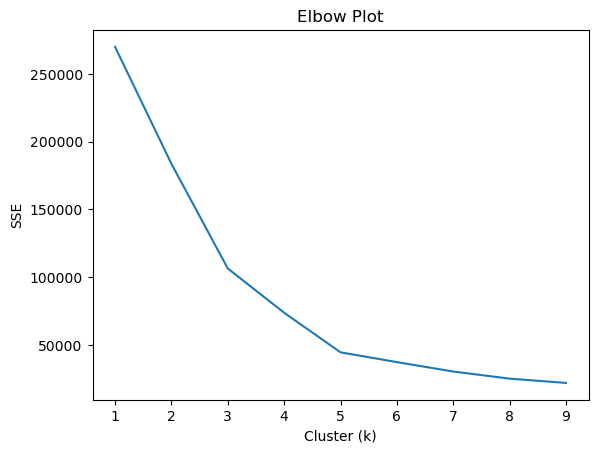

In [14]:
plt.plot(range(1, 10), sse)
plt.xlabel('Cluster (k)')
plt.ylabel('SSE')
plt.title('Elbow Plot')
plt.show()

# Making a Model(K-Means)

In [15]:
kmeans = KMeans(n_clusters=5, random_state=666)

In [16]:
kmeans.fit(x)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=666)

In [17]:
x.head()

,Annual Income (k),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [18]:
clusters_labels = kmeans.labels_
clusters_labels[:5]

array([0, 2, 0, 2, 0])

In [19]:
x = x.values  #changing dataframe to numpy

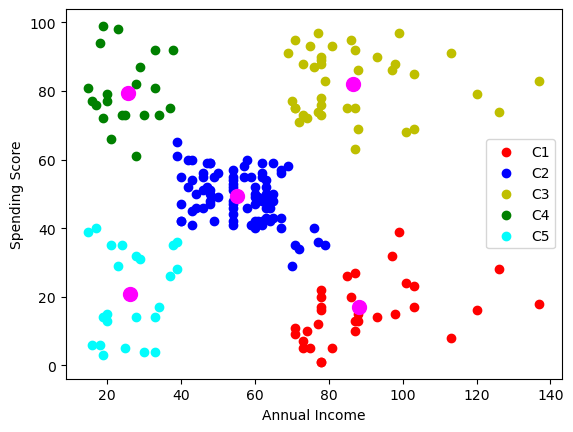

In [30]:
plt.scatter(x[clusters_labels==0, 0], x[clusters_labels==0, 1], c ='r', label= 'C1')
plt.scatter(x[clusters_labels==1, 0], x[clusters_labels==1, 1], c ='b', label= 'C2')
plt.scatter(x[clusters_labels==2, 0], x[clusters_labels==2, 1], c ='y', label= 'C3')
plt.scatter(x[clusters_labels==3, 0], x[clusters_labels==3, 1], c ='g', label= 'C4')
plt.scatter(x[clusters_labels==4, 0], x[clusters_labels==4, 1], c ='#03fcfc', label= 'C5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s= 100, c= 'magenta' )
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [21]:
kmeans.cluster_centers_

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571]])

# Prediction my Model

In [22]:
pred_data = [[100, 5], [40,10], [50,30]]

In [23]:
kmeans.predict(pred_data)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4, 0, 3])

# Making a Model(Agglomerative Clustering)

In [24]:
agglo = AgglomerativeClustering(n_clusters=5)
agglo.fit(x)
clusters_labels = agglo.labels_

In [25]:
x[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

In [26]:
clusters_labels[:5]

array([4, 3, 4, 3, 4], dtype=int64)

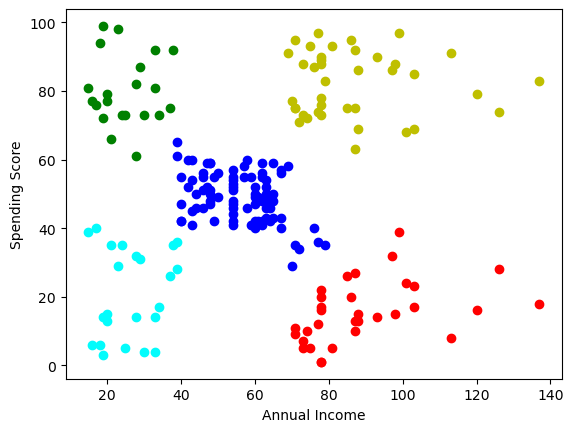

In [27]:
plt.scatter(x[clusters_labels==0, 0], x[clusters_labels==0, 1], c ='r')
plt.scatter(x[clusters_labels==1, 0], x[clusters_labels==1, 1], c ='b')
plt.scatter(x[clusters_labels==2, 0], x[clusters_labels==2, 1], c ='y')
plt.scatter(x[clusters_labels==3, 0], x[clusters_labels==3, 1], c ='g')
plt.scatter(x[clusters_labels==4, 0], x[clusters_labels==4, 1], c ='#03fcfc')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()